In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
%matplotlib inline

In [14]:
fashion_train_df= pd.read_csv('fashion-mnist_train.csv')
fashion_test_df = pd.read_csv('fashion-mnist_test.csv')

In [15]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
fashion_train_df.shape

(60000, 785)

In [18]:
fashion_test_df.shape

(10000, 785)

In [19]:
training = np.array(fashion_train_df,dtype='float32')
testing = np.array(fashion_test_df,dtype='float32')

In [20]:
training.shape

(60000, 785)

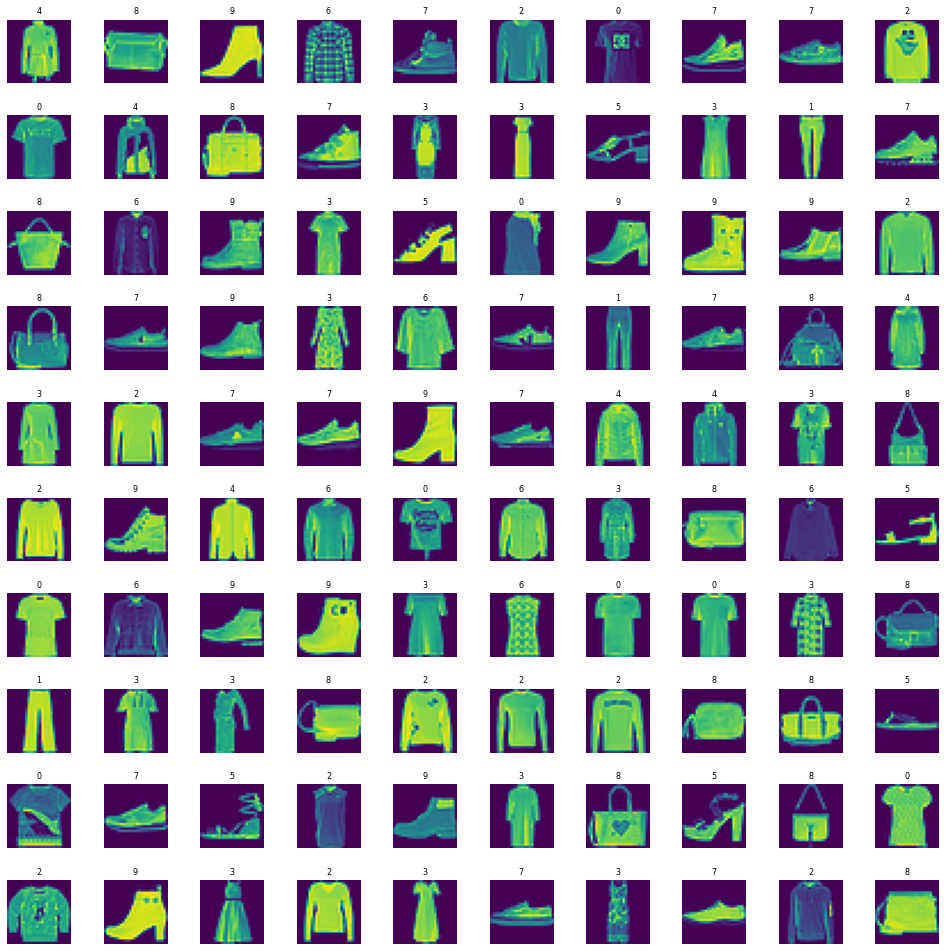

In [21]:

# Lets show multiple images in a 15x15 grid
height = 10
width = 10

fig, axes = plt.subplots(nrows=width, ncols=height, figsize=(17,17))
axes = axes.ravel()  # this flattens the 15x15 matrix into 225
n_train = len(training)

for i in range(0, height*width):
    index = np.random.randint(0, n_train)
    axes[i].imshow(training[index, 1:].reshape(28,28))
    axes[i].set_title(int(training[index, 0]), fontsize=8)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace=0.5)

In [22]:
X_train = training[:,1:]/255
y_train = training[:,0]
X_test = testing[:,1:]/255
y_test = testing[:,0]    

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train,test_size = 0.2,random_state = 12345)

In [19]:
X_train = X_train.reshape(X_train.shape[0],*(28,28,1))
X_test = X_test.reshape(X_test.shape[0],*(28,28,1))
X_validate = X_validate.reshape(X_validate.shape[0],*(28,28,1))

In [20]:
X_train.shape

(48000, 28, 28, 1)

In [21]:
X_test.shape

(10000, 28, 28, 1)

In [22]:
X_validate.shape

(12000, 28, 28, 1)

In [23]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import TensorBoard

In [24]:
cnn_model = Sequential()
cnn_model.add(Conv2D(32,3,3,input_shape = (28,28,1),activation = 'relu'))
cnn_model.add(MaxPooling2D(pool_size= (2,2)))
cnn_model.add(Flatten())
cnn_model.add(Dense(32,activation = 'relu'))
cnn_model.add(Dense(10,activation = 'sigmoid'))
cnn_model.compile(loss ='sparse_categorical_crossentropy',optimizer = Adam(learning_rate=0.001),metrics= ['accuracy'])

In [25]:
epochs = 200

In [26]:
cnn_model.fit(X_train,y_train,batch_size =512,epochs = epochs,verbose = 1,validation_data = (X_validate,y_validate) )

Epoch 1/200
94/94 [==============================] - 3s 20ms/step - loss: 1.4150 - accuracy: 0.5487 - val_loss: 0.8243 - val_accuracy: 0.7161
Epoch 2/200
94/94 [==============================] - 2s 17ms/step - loss: 0.7299 - accuracy: 0.7411 - val_loss: 0.6798 - val_accuracy: 0.7531
Epoch 3/200
94/94 [==============================] - 2s 18ms/step - loss: 0.6363 - accuracy: 0.7676 - val_loss: 0.6195 - val_accuracy: 0.7766
Epoch 4/200
94/94 [==============================] - 2s 17ms/step - loss: 0.5906 - accuracy: 0.7879 - val_loss: 0.5778 - val_accuracy: 0.7938
Epoch 5/200
94/94 [==============================] - 2s 16ms/step - loss: 0.5562 - accuracy: 0.7989 - val_loss: 0.5510 - val_accuracy: 0.8057
Epoch 6/200
94/94 [==============================] - 2s 18ms/step - loss: 0.5331 - accuracy: 0.8076 - val_loss: 0.5309 - val_accuracy: 0.8105
Epoch 7/200
94/94 [==============================] - 2s 18ms/step - loss: 0.5113 - accuracy: 0.8161 - val_loss: 0.5130 - val_accuracy: 0.8124
Epoch 

94/94 [==============================] - 2s 25ms/step - loss: 0.2944 - accuracy: 0.8914 - val_loss: 0.3596 - val_accuracy: 0.8705
Epoch 116/200
94/94 [==============================] - 2s 25ms/step - loss: 0.2922 - accuracy: 0.8924 - val_loss: 0.3516 - val_accuracy: 0.8718
Epoch 117/200
94/94 [==============================] - 2s 25ms/step - loss: 0.2895 - accuracy: 0.8935 - val_loss: 0.3571 - val_accuracy: 0.8702
Epoch 118/200
94/94 [==============================] - 2s 24ms/step - loss: 0.2916 - accuracy: 0.8928 - val_loss: 0.3541 - val_accuracy: 0.8692
Epoch 119/200
94/94 [==============================] - 2s 24ms/step - loss: 0.2901 - accuracy: 0.8933 - val_loss: 0.3602 - val_accuracy: 0.8655
Epoch 120/200
94/94 [==============================] - 2s 25ms/step - loss: 0.2908 - accuracy: 0.8929 - val_loss: 0.3513 - val_accuracy: 0.8705
Epoch 121/200
94/94 [==============================] - 3s 27ms/step - loss: 0.2879 - accuracy: 0.8945 - val_loss: 0.3524 - val_accuracy: 0.8723
Epoch 

Epoch 172/200
94/94 [==============================] - 2s 24ms/step - loss: 0.2626 - accuracy: 0.9029 - val_loss: 0.3578 - val_accuracy: 0.8715
Epoch 173/200
94/94 [==============================] - 2s 24ms/step - loss: 0.2614 - accuracy: 0.9039 - val_loss: 0.3542 - val_accuracy: 0.8721
Epoch 174/200
94/94 [==============================] - 2s 24ms/step - loss: 0.2632 - accuracy: 0.9027 - val_loss: 0.3611 - val_accuracy: 0.8690
Epoch 175/200
94/94 [==============================] - 2s 24ms/step - loss: 0.2613 - accuracy: 0.9036 - val_loss: 0.3500 - val_accuracy: 0.8748
Epoch 176/200
94/94 [==============================] - 2s 24ms/step - loss: 0.2593 - accuracy: 0.9050 - val_loss: 0.3529 - val_accuracy: 0.8733
Epoch 177/200
94/94 [==============================] - 2s 24ms/step - loss: 0.2587 - accuracy: 0.9052 - val_loss: 0.3542 - val_accuracy: 0.8717
Epoch 178/200
94/94 [==============================] - 2s 24ms/step - loss: 0.2603 - accuracy: 0.9038 - val_loss: 0.3685 - val_accuracy:

In [27]:
evaluation = cnn_model.evaluate(X_test,y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.3338 - accuracy: 0.8822
Test Accuracy : 0.882


In [28]:
predicted_classes = np.argmax(cnn_model.predict(X_test),axis=-1)
predicted_classes

313/313 [==============================] - 1s 2ms/step


array([0, 1, 2, ..., 8, 8, 1], dtype=int64)

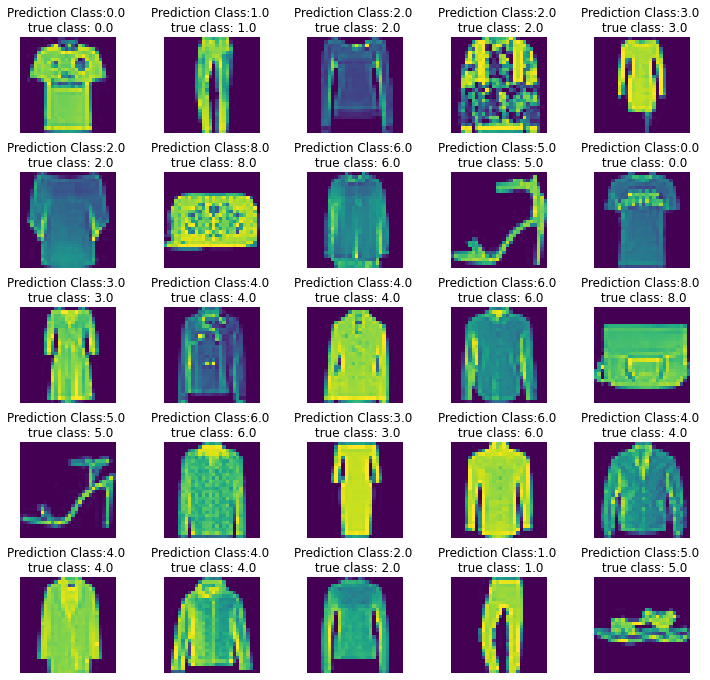

In [30]:
L = 5
W = 5
fig,axes = plt.subplots(L,W,figsize = (12,12))
axes = axes.ravel()
for i in np.arange(0,L*W):
  axes[i].imshow(X_test[i].reshape(28,28))
  axes[i].set_title('Prediction Class:{1} \n true class: {1}'.format(predicted_classes[i],y_test[i]))
  axes[i].axis('off')
plt.subplots_adjust(wspace = 0.5)

In [31]:
from sklearn.metrics import classification_report
classes = 10
targets = ["Class {}".format(i) for i in range(classes)]
print(classification_report(y_test, predicted_classes, target_names = targets))

              precision    recall  f1-score   support

     Class 0       0.82      0.83      0.82      1000
     Class 1       0.98      0.97      0.97      1000
     Class 2       0.82      0.82      0.82      1000
     Class 3       0.88      0.89      0.89      1000
     Class 4       0.80      0.85      0.82      1000
     Class 5       0.97      0.94      0.95      1000
     Class 6       0.72      0.64      0.68      1000
     Class 7       0.92      0.94      0.93      1000
     Class 8       0.96      0.97      0.97      1000
     Class 9       0.96      0.96      0.96      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000

